In [49]:
import xgboost as xgb
import pandas as pd


data = pd.read_csv(r"C:\Users\tymot\Downloads\Merged_utf8.csv", delimiter=';')
data

,Sezon,Data,Godzina,Stadion,Sędzia,Gospodarze,Goście,Posiadanie piłki A,Posiadanie piłki H,Strzały na bramkę A,Strzały na bramkę H,Strzały niecelne A,Strzały niecelne H,Strzały zablokowane A,Strzały zablokowane H,Sytuacje bramkowe A,Sytuacje bramkowe H,Faule A,Faule H,Interwencje bramkarzy A,Interwencje bramkarzy H,Czerwone kartki A,Czerwone kartki H,Rzuty rożne A,Rzuty rożne H,Rzuty wolne A,Rzuty wolne H,Spalone A,Spalone H,Wrzuty z autu A,Wrzuty z autu H,Żółte kartki A,Żółte kartki H,AG,HG,AvgA,AvgD,AvgH,MaxA,MaxD,MaxH,PA,PD,PH,Res
0,2021/2022,21.05.2022,17:30,Stadion Miejski (Poznań),Marciniak S. (Pol),Lech Poznań,Zagłębie Lubin,"0,44","0,56",6,9,4,11,5.0,1.0,15.0,21.0,13.0,9.0,7.0,5.0,0,0,7,4,7.0,14.0,2.0,0.0,15.0,31.0,2.0,1.0,1,2,"6,98","5,08","1,37","7,86","5,9","1,4","7,56","5,9","1,37",H
1,2021/2022,21.05.2022,17:30,Stadion GKS Górnik Łęczna (Łęczna),Gryckiewicz P. (Pol),Górnik Łęczna,Jagiellonia Białystok,"0,53","0,47",4,2,5,5,5.0,3.0,14.0,10.0,12.0,20.0,2.0,3.0,0,0,5,4,18.0,16.0,2.0,0.0,11.0,14.0,3.0,4.0,1,0,"1,96","3,58","3,58","2,05","3,78","3,9","1,97","3,78","3,9",A
2,2021/2022,21.05.2022,17:30,Stadion Wojska Polskiego (Warszawa),Kos D. (Pol),Legia Warszawa,Cracovia,"0,49","0,51",2,4,7,6,6.0,2.0,15.0,12.0,11.0,16.0,1.0,2.0,0,0,7,4,16.0,14.0,3.0,1.0,21.0,17.0,0.0,2.0,0,3,"3,92","3,51","1,89","4,2","3,72","1,96","4,13","3,6","1,96",H
3,2021/2022,21.05.2022,17:30,Stadion Miejski w Gliwicach (Gliwice),Musial T. (Pol),Piast Gliwice,Radomiak Radom,"0,49","0,51",2,3,6,7,2.0,4.0,10.0,14.0,20.0,10.0,2.0,1.0,0,0,3,7,10.0,20.0,2.0,1.0,13.0,12.0,2.0,1.0,1,1,"3,49","3,39","2,05","3,85","3,63","2,1","3,75","3,49","2,1",D
4,2021/2022,21.05.2022,17:30,Stadion Miejski w Szczecinie (Szczecin),Stefanski D. (Pol),Pogoń Szczecin,Bruk-Bet T.,"0,46","0,54",4,6,7,9,2.0,6.0,13.0,21.0,10.0,10.0,4.0,2.0,0,0,8,8,8.0,9.0,2.0,1.0,18.0,24.0,3.0,2.0,2,2,"6,84","4,96","1,39",8,"5,29","1,45","7,87","5,29","1,4",D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2013/2014,21.07.2013,20:30,NaN,NaN,Ruch Chorzów,Lech Poznań,"0,56","0,44",2,2,4,5,NaN,NaN,6.0,7.0,NaN,NaN,2.0,1.0,1,0,8,7,10.0,10.0,NaN,NaN,31.0,27.0,2.0,1.0,1,1,"1,92","3,25","4,02","2,04","3,7","4,67","1,9","3,5","4,67",D
2614,2013/2014,20.07.2013,15:30,NaN,NaN,Zawisza Bydgoszcz,Jagiellonia Białystok,NaN,NaN,4,3,6,6,6.0,2.0,16.0,11.0,NaN,NaN,3.0,3.0,0,1,4,0,24.0,13.0,NaN,NaN,19.0,23.0,2.0,4.0,1,0,"3,32","3,15","2,18","3,73","3,3","2,5","3,73","3,3","2,19",A
2615,2013/2014,20.07.2013,18:00,NaN,NaN,Legia Warszawa,Widzew Łódź,"0,41","0,59",5,7,3,8,NaN,NaN,8.0,15.0,11.0,18.0,2.0,4.0,0,0,5,8,24.0,10.0,1.0,6.0,28.0,28.0,3.0,1.0,1,5,"9,83","4,68","1,31","11,42","5,6","1,37","11,35","5,22","1,33",H
2616,2013/2014,19.07.2013,18:00,NaN,NaN,Zagłębie Lubin,Pogoń Szczecin,"0,43","0,57",5,1,5,9,NaN,NaN,10.0,10.0,21.0,17.0,1.0,3.0,0,0,4,1,20.0,26.0,3.0,1.0,23.0,29.0,0.0,1.0,2,0,"4,47","3,36","1,81",5,"3,7","1,87","4,87","3,67","1,83",A


In [50]:
data = data.drop(data.columns[[13,14,25,26,29,30]],axis = 1)
pd.set_option('display.max_columns', None)
data

,Sezon,Data,Godzina,Stadion,Sędzia,Gospodarze,Goście,Posiadanie piłki A,Posiadanie piłki H,Strzały na bramkę A,Strzały na bramkę H,Strzały niecelne A,Strzały niecelne H,Sytuacje bramkowe A,Sytuacje bramkowe H,Faule A,Faule H,Interwencje bramkarzy A,Interwencje bramkarzy H,Czerwone kartki A,Czerwone kartki H,Rzuty rożne A,Rzuty rożne H,Spalone A,Spalone H,Żółte kartki A,Żółte kartki H,AG,HG,AvgA,AvgD,AvgH,MaxA,MaxD,MaxH,PA,PD,PH,Res
0,2021/2022,21.05.2022,17:30,Stadion Miejski (Poznań),Marciniak S. (Pol),Lech Poznań,Zagłębie Lubin,"0,44","0,56",6,9,4,11,15.0,21.0,13.0,9.0,7.0,5.0,0,0,7,4,2.0,0.0,2.0,1.0,1,2,"6,98","5,08","1,37","7,86","5,9","1,4","7,56","5,9","1,37",H
1,2021/2022,21.05.2022,17:30,Stadion GKS Górnik Łęczna (Łęczna),Gryckiewicz P. (Pol),Górnik Łęczna,Jagiellonia Białystok,"0,53","0,47",4,2,5,5,14.0,10.0,12.0,20.0,2.0,3.0,0,0,5,4,2.0,0.0,3.0,4.0,1,0,"1,96","3,58","3,58","2,05","3,78","3,9","1,97","3,78","3,9",A
2,2021/2022,21.05.2022,17:30,Stadion Wojska Polskiego (Warszawa),Kos D. (Pol),Legia Warszawa,Cracovia,"0,49","0,51",2,4,7,6,15.0,12.0,11.0,16.0,1.0,2.0,0,0,7,4,3.0,1.0,0.0,2.0,0,3,"3,92","3,51","1,89","4,2","3,72","1,96","4,13","3,6","1,96",H
3,2021/2022,21.05.2022,17:30,Stadion Miejski w Gliwicach (Gliwice),Musial T. (Pol),Piast Gliwice,Radomiak Radom,"0,49","0,51",2,3,6,7,10.0,14.0,20.0,10.0,2.0,1.0,0,0,3,7,2.0,1.0,2.0,1.0,1,1,"3,49","3,39","2,05","3,85","3,63","2,1","3,75","3,49","2,1",D
4,2021/2022,21.05.2022,17:30,Stadion Miejski w Szczecinie (Szczecin),Stefanski D. (Pol),Pogoń Szczecin,Bruk-Bet T.,"0,46","0,54",4,6,7,9,13.0,21.0,10.0,10.0,4.0,2.0,0,0,8,8,2.0,1.0,3.0,2.0,2,2,"6,84","4,96","1,39",8,"5,29","1,45","7,87","5,29","1,4",D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,2013/2014,21.07.2013,20:30,NaN,NaN,Ruch Chorzów,Lech Poznań,"0,56","0,44",2,2,4,5,6.0,7.0,NaN,NaN,2.0,1.0,1,0,8,7,NaN,NaN,2.0,1.0,1,1,"1,92","3,25","4,02","2,04","3,7","4,67","1,9","3,5","4,67",D
2614,2013/2014,20.07.2013,15:30,NaN,NaN,Zawisza Bydgoszcz,Jagiellonia Białystok,NaN,NaN,4,3,6,6,16.0,11.0,NaN,NaN,3.0,3.0,0,1,4,0,NaN,NaN,2.0,4.0,1,0,"3,32","3,15","2,18","3,73","3,3","2,5","3,73","3,3","2,19",A
2615,2013/2014,20.07.2013,18:00,NaN,NaN,Legia Warszawa,Widzew Łódź,"0,41","0,59",5,7,3,8,8.0,15.0,11.0,18.0,2.0,4.0,0,0,5,8,1.0,6.0,3.0,1.0,1,5,"9,83","4,68","1,31","11,42","5,6","1,37","11,35","5,22","1,33",H
2616,2013/2014,19.07.2013,18:00,NaN,NaN,Zagłębie Lubin,Pogoń Szczecin,"0,43","0,57",5,1,5,9,10.0,10.0,21.0,17.0,1.0,3.0,0,0,4,1,3.0,1.0,0.0,1.0,2,0,"4,47","3,36","1,81",5,"3,7","1,87","4,87","3,67","1,83",A


In [56]:
data['Goście'].dtype

dtype('O')

In [51]:
data.dropna()

,Sezon,Data,Godzina,Stadion,Sędzia,Gospodarze,Goście,Posiadanie piłki A,Posiadanie piłki H,Strzały na bramkę A,Strzały na bramkę H,Strzały niecelne A,Strzały niecelne H,Sytuacje bramkowe A,Sytuacje bramkowe H,Faule A,Faule H,Interwencje bramkarzy A,Interwencje bramkarzy H,Czerwone kartki A,Czerwone kartki H,Rzuty rożne A,Rzuty rożne H,Spalone A,Spalone H,Żółte kartki A,Żółte kartki H,AG,HG,AvgA,AvgD,AvgH,MaxA,MaxD,MaxH,PA,PD,PH,Res
0,2021/2022,21.05.2022,17:30,Stadion Miejski (Poznań),Marciniak S. (Pol),Lech Poznań,Zagłębie Lubin,"0,44","0,56",6,9,4,11,15.0,21.0,13.0,9.0,7.0,5.0,0,0,7,4,2.0,0.0,2.0,1.0,1,2,"6,98","5,08","1,37","7,86","5,9","1,4","7,56","5,9","1,37",H
1,2021/2022,21.05.2022,17:30,Stadion GKS Górnik Łęczna (Łęczna),Gryckiewicz P. (Pol),Górnik Łęczna,Jagiellonia Białystok,"0,53","0,47",4,2,5,5,14.0,10.0,12.0,20.0,2.0,3.0,0,0,5,4,2.0,0.0,3.0,4.0,1,0,"1,96","3,58","3,58","2,05","3,78","3,9","1,97","3,78","3,9",A
2,2021/2022,21.05.2022,17:30,Stadion Wojska Polskiego (Warszawa),Kos D. (Pol),Legia Warszawa,Cracovia,"0,49","0,51",2,4,7,6,15.0,12.0,11.0,16.0,1.0,2.0,0,0,7,4,3.0,1.0,0.0,2.0,0,3,"3,92","3,51","1,89","4,2","3,72","1,96","4,13","3,6","1,96",H
3,2021/2022,21.05.2022,17:30,Stadion Miejski w Gliwicach (Gliwice),Musial T. (Pol),Piast Gliwice,Radomiak Radom,"0,49","0,51",2,3,6,7,10.0,14.0,20.0,10.0,2.0,1.0,0,0,3,7,2.0,1.0,2.0,1.0,1,1,"3,49","3,39","2,05","3,85","3,63","2,1","3,75","3,49","2,1",D
4,2021/2022,21.05.2022,17:30,Stadion Miejski w Szczecinie (Szczecin),Stefanski D. (Pol),Pogoń Szczecin,Bruk-Bet T.,"0,46","0,54",4,6,7,9,13.0,21.0,10.0,10.0,4.0,2.0,0,0,8,8,2.0,1.0,3.0,2.0,2,2,"6,84","4,96","1,39",8,"5,29","1,45","7,87","5,29","1,4",D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2511,2013/2014,29.10.2013,18:00,Stadion Miejski w Szczecinie (Szczecin),Frankowski B. (Pol),Pogoń Szczecin,Piast Gliwice,"0,38","0,62",1,10,1,5,7.0,18.0,14.0,19.0,6.0,1.0,1,0,3,4,0.0,0.0,0.0,1.0,0,4,"3,41","3,24","2,13","3,85","3,5","2,28","3,49","3,35","2,28",H
2512,2013/2014,29.10.2013,20:30,Stadion Miejski im. Henryka Reymana (Kraków),Gil P. (Pol),Wisła Kraków,Widzew Łódź,"0,34","0,66",3,8,6,7,10.0,19.0,14.0,25.0,5.0,3.0,1,0,4,1,0.0,2.0,2.0,5.0,0,3,"7,09","3,94","1,48","8,95","4,3","1,58","6,7","4,11","1,58",H
2513,2013/2014,28.10.2013,18:00,Stadion im. Ernesta Pohla (Zabrze),Borski M. (Pol),Górnik Zabrze,Cracovia,"0,56","0,44",3,3,5,1,13.0,6.0,14.0,10.0,3.0,2.0,0,0,3,0,3.0,0.0,2.0,2.0,1,0,"3,73","3,31","1,99","4,16","3,5","2,17","3,79","3,42","2,13",A
2518,2013/2014,26.10.2013,20:30,Stadion Miejski im. Henryka Reymana (Kraków),Rynkiewicz J. (Pol),Wisła Kraków,Zagłębie Lubin,"0,46","0,54",4,3,5,8,16.0,16.0,5.0,13.0,2.0,4.0,0,0,7,6,6.0,0.0,1.0,3.0,0,1,"4,41","3,27","1,86",5,"3,5","1,94","4,84","3,34","1,93",H


In [44]:
data = data.drop(data[['AG','HG']],axis = 1)

In [45]:
from sklearn.model_selection import train_test_split
features = data.iloc[:, :-2]
labels = data['Res']


train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, shuffle=False)


In [46]:
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

label_encoder = LabelEncoder()

for column in train_features.columns:
    if train_features[column].dtype == 'O':  # Sprawdzenie typu kolumny (kategoryczna)
        #train_features[column] = train_features[column].astype('category')
        train_features[column] = label_encoder.fit_transform(train_features[column])

for column in test_features.columns:
    if test_features[column].dtype == 'O':  # Sprawdzenie typu kolumny (kategoryczna)
        #train_features[column] = train_features[column].astype('category')
        test_features[column] = label_encoder.fit_transform(test_features[column])

display(train_features)
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

model = xgb.XGBClassifier()
model.fit(train_features, train_labels_encoded) #xgb_model=r"C:\Users\tymot\Desktop\Projekty\Prawdopodobieństwa fragów\xgboostModel")

pred_labels_encoded = model.predict(test_features)
pred_labels = label_encoder.inverse_transform(pred_labels_encoded)

accuracy = accuracy_score(test_labels, pred_labels)
print('accuracy:',accuracy)

,Sezon,Data,Godzina,Stadion,Sędzia,Gospodarze,Goście,Posiadanie piłki A,Posiadanie piłki H,Strzały na bramkę A,Strzały na bramkę H,Strzały niecelne A,Strzały niecelne H,Sytuacje bramkowe A,Sytuacje bramkowe H,Faule A,Faule H,Interwencje bramkarzy A,Interwencje bramkarzy H,Czerwone kartki A,Czerwone kartki H,Rzuty rożne A,Rzuty rożne H,Spalone A,Spalone H,Żółte kartki A,Żółte kartki H,AvgA,AvgD,AvgH,MaxA,MaxD,MaxH,PA,PD
0,7,592,6,47,20,8,23,20,31,6,9,4,11,15.0,21.0,13.0,9.0,7.0,5.0,0,0,7,4,2.0,0.0,2.0,1.0,486,185,16,484,195,16,529,219
1,7,592,6,39,8,5,6,29,22,4,2,5,5,14.0,10.0,12.0,20.0,2.0,3.0,0,0,5,4,2.0,0.0,3.0,4.0,51,71,236,78,71,250,46,85
2,7,592,6,54,13,10,2,25,26,2,4,7,6,15.0,12.0,11.0,16.0,1.0,2.0,0,0,7,4,3.0,1.0,0.0,2.0,270,64,68,292,65,72,301,67
3,7,592,6,49,21,12,15,25,26,2,3,6,7,10.0,14.0,20.0,10.0,2.0,1.0,0,0,3,7,2.0,1.0,2.0,1.0,227,52,85,259,56,87,263,56
4,7,592,6,50,35,14,1,22,29,4,6,7,9,13.0,21.0,10.0,10.0,4.0,2.0,0,0,8,8,2.0,1.0,3.0,2.0,480,177,18,487,179,21,539,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2089,0,823,12,62,27,27,21,25,26,0,3,8,2,9.0,7.0,17.0,16.0,2.0,0.0,0,0,0,1,0.0,1.0,3.0,1.0,208,38,97,234,33,109,244,41
2090,0,740,1,49,16,12,13,26,25,3,5,10,4,16.0,11.0,15.0,15.0,2.0,3.0,1,0,6,7,3.0,1.0,5.0,2.0,169,32,120,192,29,135,192,43
2091,0,740,3,37,35,9,5,18,33,0,8,0,7,2.0,19.0,16.0,10.0,6.0,0.0,0,0,2,7,3.0,0.0,3.0,3.0,378,55,51,431,63,56,452,75
2092,0,740,7,48,44,21,7,16,35,5,5,8,4,15.0,11.0,15.0,18.0,3.0,5.0,0,0,10,5,0.0,1.0,1.0,2.0,236,43,85,273,43,93,268,57


accuracy: 0.7557251908396947


In [47]:
model.feature_importances_

array([0.01689372, 0.02035274, 0.01914626, 0.0170952 , 0.01658867,
       0.01928162, 0.02135762, 0.03247315, 0.        , 0.08190534,
       0.0868964 , 0.02141943, 0.01947385, 0.02032544, 0.01795021,
       0.01978137, 0.0196936 , 0.07781322, 0.07916062, 0.04100176,
       0.03311148, 0.01963098, 0.02297026, 0.01911871, 0.02138543,
       0.01848038, 0.02103612, 0.02366819, 0.01814866, 0.03191295,
       0.02225618, 0.02378335, 0.02840388, 0.0266834 , 0.02079979],
      dtype=float32)

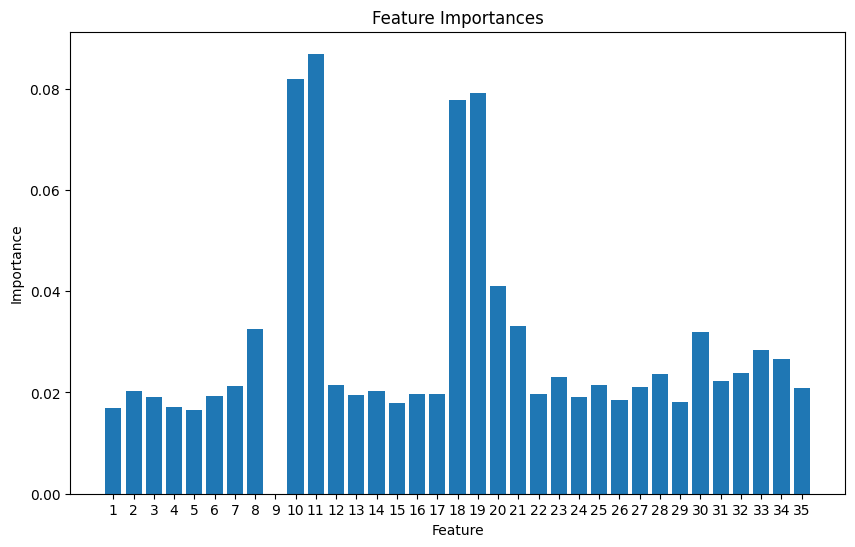

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(range(len(model.feature_importances_)), range(1, len(model.feature_importances_)+1))
plt.show()

In [23]:
test_features.columns

Index(['Sezon', 'Data', 'Godzina', 'Stadion', 'Sędzia', 'Gospodarze', 'Goście',
       'Posiadanie piłki A', 'Posiadanie piłki H', 'Strzały na bramkę A',
       'Strzały na bramkę H', 'Strzały niecelne A', 'Strzały niecelne H',
       'Faule A', 'Faule H', 'Interwencje bramkarzy A',
       'Interwencje bramkarzy H', 'Czerwone kartki A', 'Czerwone kartki H',
       'Rzuty rożne A', 'Rzuty rożne H', 'Spalone A', 'Spalone H', 'AG',
       'MaxA', 'MaxD', 'MaxH', 'PA', 'PD'],
      dtype='object')